In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score, plot_roc_curve, mean_squared_error
from sklearn.metrics import classification_report, precision_score, recall_score, plot_precision_recall_curve

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

# Содержание<a name="0"></a>

1. [Введение](#1)
2. [Решающие деревья](#2)
3. [Построение решающих деревьев](#3)
4. [Решающие деревья. Практика](#4)
5. [Бэггинг](#5)
6. [Случайный лес](#6)
7. [Случайный лес. Практика](#7)

---

# Введение<a name="1"></a>

>### ПРИМЕР
>
>* Вы приходите в банк за кредитом, подаёте анкету со всеми необходимыми документами.
>* Сотрудник банка проверяет вашу анкету:
>    1. Если объём сбережений <= 200 тыс., то перейти к шагу 2, иначе — к шагу 3.
>    2. Если рабочий стаж больше года — дать кредит, иначе — не давать.
>    3. Если продолжительность займа < 30 месяцев — не давать кредит, иначе — к шагу 4.
>    4. ...  
>    
> Путём проверки по одному правилу за раз сотрудник банка определяет, стоит ли дать вам кредит.

Аналогичный способ принятия решения мы можем также изобразить визуально, для лучшего понимания. Например, для принятия решения о страховании того или иного автовладельца дерево решений может выглядеть следующим образом:

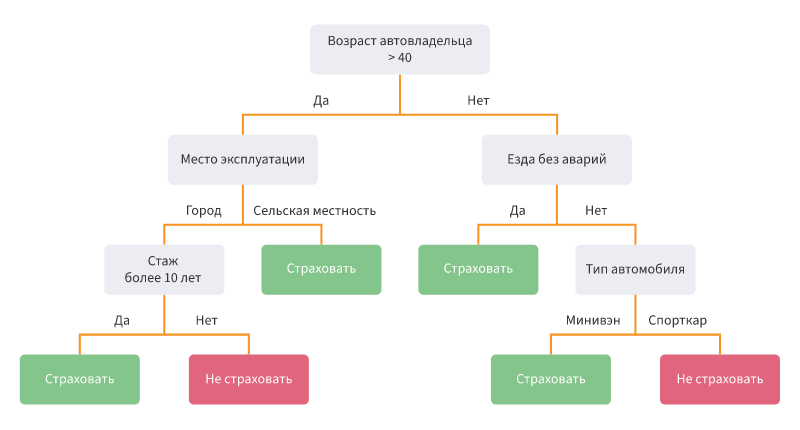

Схожим образом работает алгоритм машинного обучения <span style="color:green"><b>Решающее Дерево</b> <i>(Decision Tree)</i></span>.

>### ОПРЕДЕЛЕНИЕ
>
>Формально дерево решений — это связный ациклический граф. В нём можно выделить три типа вершин:  
>
>* Корневая вершина (*root node*) — откуда всё начинается.
>* Внутренние вершины (*intermediate nodes*).
>* Листья (*leafs*) — самые глубокие вершины дерева, в которых содержится «ответ».  
>
>Во внутренней или корневой вершине признак проверяется на некий логический критерий, по результатам которого мы движемся всё глубже по дереву.

Определенный бонус решающего дерева в том, что его легко интерпретировать, а также легко визуализировать ход принятия решения. Однако есть и ряд недостатков. В целом достоинства и недостатки данного метода следующие:

>### <span style="color:green">ДОСТОИНСТВА
>
>* <span style="color:green">Деревья требуют небольших усилий при подготовке данных (не требуется специфической предобработки).
>* <span style="color:green">Дерево решений не требует нормализации/масштабирования данных.
>* <span style="color:green">Наличие пропусков не оказывает существенного влияния на построение дерева.
>* <span style="color:green">Модель деревьев решений достаточно интуитивно понятна и легко объяснима даже людям, не разбирающимся в методе.

>### <span style="color:red">НЕДОСТАТКИ  
>
>* <span style="color:red">Требует затрат больших вычислительных мощностей (по сравнению с другими алгоритмами).
>* <span style="color:red">В силу дискретной структуры дерево не дифференцируется по параметрам — нельзя найти хотя бы локальный экстремум.
>* <span style="color:red">Небольшое изменение в данных может заметно повлиять на структуру дерева.
>* <span style="color:red">При работе с непрерывными числовыми признаками дерево делит их на категории, и теряет информацию.
>* <span style="color:red">Алгоритм дает плохие результаты, если дерево используется для решения задачи классификации при несбалансированных классах.

### ДЛЯ ЧЕГО ВООБЩЕ МОЖЕТ ПРИМЕНЯТЬСЯ РЕШАЮЩЕЕ ДЕРЕВО?

Может показаться, что решающее дерево является методом только для решения задачи классификации. Однако это не так. С помощью решающего дерева можно решить и <b><span style="color:green">задачу регрессии</span></b>. 

По сути задача регрессии с помощью дерева решений решается аналогично <b><span style="color:green">задаче классификации</span></b>, однако в итоге мы получаем не принадлежность к классу, а некоторое определенное число. Например, если мы не решаем, давать или не давать страховку, а определяем для каждого водителя определенный страховой процент в зависимости от его стажа и прочих характеристик:

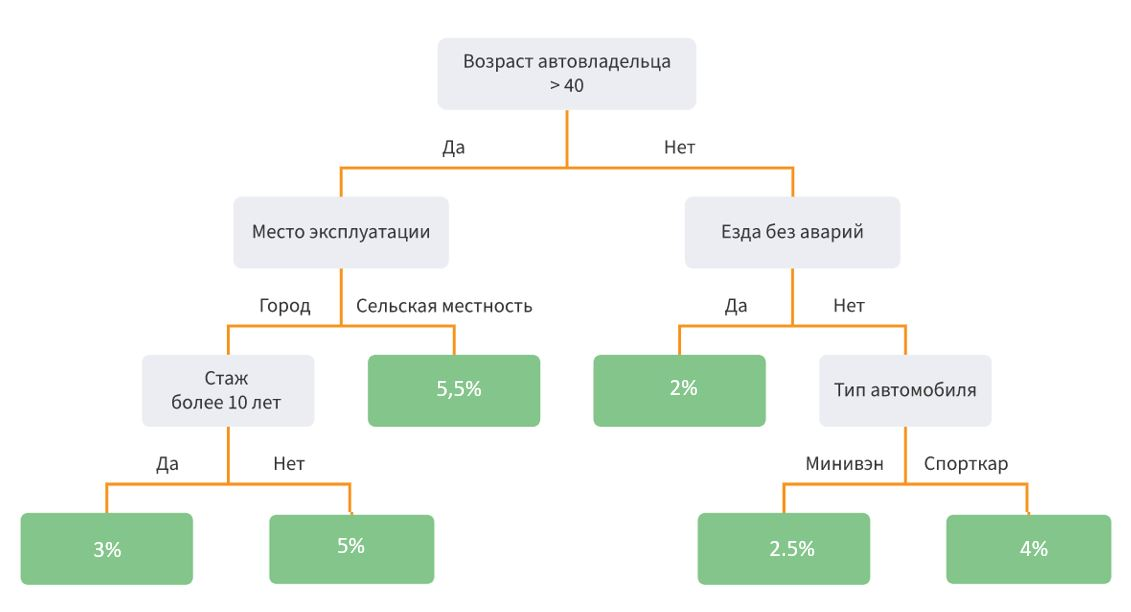

[К содержанию](#0)

---

# Решающие деревья<a name="2"></a>

Как вы уже могли заметить, этот алгоритм отличается от тех, что мы изучали ранее. Раньше мы изучали линейные модели. Перечислим <b><span style="color:green">особенности</span></b>, отличающие линейные модели от деревьев решений:  

* Линейные модели быстро учатся. В случае со среднеквадратичной ошибкой для вектора весов даже есть аналитическое решение. Также легко применять для линейных моделей градиентный спуск.
* При этом линейные модели могут восстанавливать только простые зависимости из-за ограниченного количества параметров.
* В то же время линейные модели можно использовать для восстановления нелинейных зависимостей за счёт перехода к спрямляющему пространству, что является довольно сложной операцией. 

><code>Примечание. С помощью некоторых методов можно перевести элементы для случая линейной неразделимости в новое линейно разделимое пространство. Именно такое пространство называют спрямляющим.

* Линейные модели не отражают особенности процесса принятия решений у людей. На самом деле, когда человек хочет понять ту или иную вещь, он будет задавать последовательность из простых вопросов, которые в итоге приведут его к какому-нибудь ответу.

### <span style="color:green">ОБОБЩЕННЫЙ ПСЕВДОКОД АЛГОРИТМА ПОСТРОЕНИЯ ДЕРЕВА

In [ ]:
function decision_tree(X, y):
    if stopping_criterion(X, y) == True:
        S = create_leaf_with_prediction(y)
    else:
        S = create_node()
        (X_1, y_1) .. (X_L, y_L) = best_split(X, y)
        for i in 1..L:
            C = decision_tree(X_i, y_i)
            connect_nodes(S, C)
    return S

Разберём, как строится дерево решений по заданной исходной выборке $X_0$ и ответах на ней $y_0$.  

Выше представлена <b><span style="color:green">рекурсивная функция</span></b>, которая при каждом новом вызове проверяет критерий остановки (*stopping_criterion*) для текущей подвыборки $(X, y)$.

Если критерий выполняется, то тогда функция возвращает $S$ — новый лист дерева с предсказанием (*create_leaf_with_prediction*), на основе правильных ответов $y$. Все объекты, которые попадут в этот лист, будут иметь это предсказание.

В ином случае строится внутренняя вершина, в которой затем будет определено правило разделения, по которому объекты могут попасть в одну из $L$ ветвей. Наилучшее разбиение (*best_split*) может определяться с помощью различных мер неопределённости (*impurity measures*), их мы обсудим позднее.

Подвыборки $(X_1, y_1)..(X_L, y_L)$ подаются на вход следующим вызовам нашей рекурсивной функции, чтобы в этих вызовах определить правила разбиения на более глубоких уровнях дерева. Эти вызовы вернут поддеревья $C$, которые затем можно объединить с построенным узлом $S$.

><code>Примечание. Узел дерева (например, **S**) задаёт целое поддерево идущих за ним узлов, если такие имеются, а не только сам этот узел.

### <span style="color:green">РЕШАЮЩИЕ ДЕРЕВЬЯ ДЛЯ ЗАДАЧИ КЛАССИФИКАЦИИ

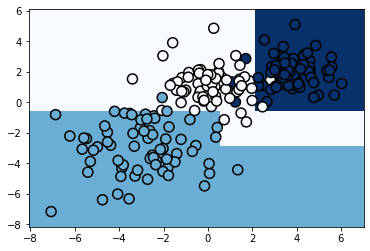

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=200, centers=[(0,1),(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(1.2,1.5,1,))

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='Blues')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='Blues', edgecolors='black', linewidth=1.5);

### Задачи

In [3]:
bill_data = pd.read_csv('bill_authentication.csv')

In [4]:
bill_data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Обучите на предложенных данных решающее дерево. Целевой переменной здесь является переменная <code>Class</code>. Размер тестовой выборки возьмите за <code>0.2, random_state = 17</code> для разбиения и дерева. Максимальную глубину дерева примите за $3$, максимальное число признаков, по которым ищется лучшее разбиение в дереве — за $2$. Какое значение *f1-score* вы получили?

In [8]:
X = bill_data.drop(['Class'], axis=1)
y = bill_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 17)

In [9]:
clf_tree = DecisionTreeClassifier(max_depth=3, max_features=2, random_state=17)

In [10]:
clf_tree.fit(X_train, y_train)

y_pred = clf_tree.predict(X_test)
F1 = f1_score(y_test, y_pred)

In [12]:
print(f'F1 Score = {round(F1, 3)}')

F1 Score = 0.866


Проклассифицируйте банкноту с вектором признаков <code>2.04378,-0.38422,1.437292,0.76421</code>. К какому классу она относится?

In [13]:
vector = [2.04378,-0.38422,1.437292,0.76421]
vector_pred = clf_tree.predict([vector])

In [16]:
print(f'Class = {vector_pred[0]}')

Class = 0


Здесь приведена <b><span style="color:green">визуализация</span></b> того, как одно решающее дерево разделяет выборку, состоящую из <b><span style="color:green">трёх классов</span></b>.  

Видно, что решающее дерево может очень неплохо отделить каждый класс от всех остальных. Разделяющая поверхность каждого класса кусочно-постоянная, и при этом каждая сторона поверхности параллельна оси координат, так как каждое условие сравнивает значение ровно одного признака с порогом.  

В то же время решающее дерево вполне может переобучиться: его можно сделать настолько глубоким, что каждый лист решающего дерева будет соответствовать ровно одному объекту обучающей выборки. В этом случае, если записать в каждом листе ответ соответствующего объекта, на обучающей выборке получается нулевая ошибка. Дерево получается явно <b><span style="color:green">переобученным</span></b>. Пример такого дерева:

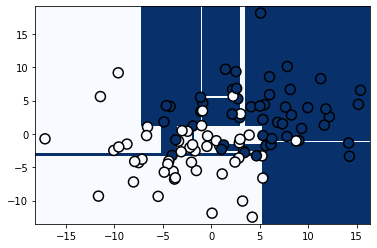

In [5]:
RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=100, centers=[(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(5,5))


clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='Blues')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='Blues', edgecolors='black', linewidth=1.5);

### <span style="color:green">РЕШАЮЩИЕ ДЕРЕВЬЯ ДЛЯ ЗАДАЧИ РЕГРЕССИИ

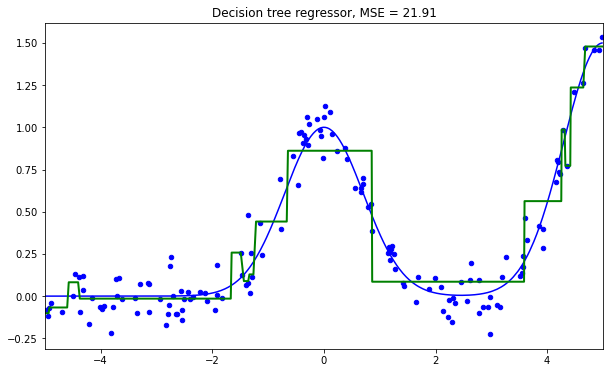

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 5) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 5) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=4, random_state=RANDOM_SEED)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

### <span style="color:green">БОРЬБА С ПЕРЕОБУЧЕНИЕМ (РЕГУЛЯРИЗАЦИЯ)

Приведём несколько возможных способов сделать алгоритм более обобщающим, т.е. менее заточенным под конкретную выборку:

* Задать порог по мере неопределённости: $I(S) \leq \theta$
* Задать порог по размеру узла: $\left |S \right | \leq n$
* Задать порог на глубину: $Depth(T)=d$
* Задать порог на размер потомков $\left | S_L \right |\leq n_1$ & $\left | S_R \right | \leq n_2$, здесь $S$ — это узел дерева, $T$ — дерево, $\left |S \right |$ — количество элементов в узле, $S_L, S_R$ — соответственно правый и левый потомок узла $S$.

### ЗАДАЧА О ПОТРЕБЛЕНИИ ТОПЛИВА

In [19]:
petrol_data = pd.read_csv('petrol_consumption.csv')
petrol_data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [21]:
X = petrol_data.drop(['Petrol_Consumption'], axis=1)
y = petrol_data['Petrol_Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

Обучите решающее дерево для регрессии на предложенных данных, размер тестовой выборки возьмите за <code>0.3, random_state = 42</code> для разбиения и дерева. Вычислите *RMSE*.

In [22]:
reg_tree = DecisionTreeRegressor(random_state=42)

In [23]:
reg_tree.fit(X_train, y_train)
y_pred = reg_tree.predict(X_test)

In [25]:
RMSE = mean_squared_error(y_test, y_pred)**0.5
print(f'RMSE = {round(RMSE, 2)}')

RMSE = 87.97


Какова глубина дерева?

In [26]:
print(f'Глубина дерева = {reg_tree.get_depth()}')

Глубина дерева = 11


[К содержанию](#0)

---

# Построение решающих деревьев<a name="3"></a>

### <span style="color:green">ПОСТРОЕНИЕ ДЕРЕВА

В случае CART-деревьев, которые рассматриваются в этом уроке, дерево строится жадным способом. Это значит, что на каждом этапе построения очередных двух потомков находится наилучшее с точки зрения критерия разделение выборки. В алгоритме, который мы описали ранее, имели место вызовы функции best_split(X,y), сейчас мы разберём, что есть лучшее разбиение.

Формально это записывается следующим образом:

Пусть в вершину $m$ попало множество $X_m$ объектов из обучающей выборки. Параметры в условии $[x^j \leq t]$ будут выбраны так, чтобы минимизировать данный критерий ошибки $Q(X_m, j, t)$, зависящий от этих параметров:  

$$Q(X_m, j, t) → \min_{j,\, t}{},$$  

где $j$ — номер признака, $t$ — пороговое значение признака. Параметры $j$ и $t$ можно подбирать перебором. Действительно, признаков конечное число, а из всех возможных значений порога $t$ можно рассматривать только те, при которых получаются различные разбиения. Можно показать, что таких значений параметра $t$ столько, сколько различных значений признака $x^j$ на обучающей выборке.

После того, как параметры были выбраны, множество $X_m$ объектов из обучающей выборки разбивается на два множества  

$$X_{\ell} = \{x \in X_m \, | \, [x^j \leq t]\},$$ $$X_r = \{x \in X_m \, | \, [x^j > t]\},$$

каждое из которых соответствует своей дочерней вершине.

Предложенную процедуру можно продолжить для каждой из дочерних вершин: в этом случае дерево будет все больше и больше углубляться. Такой процесс рано или поздно должен остановиться, и очередная дочерняя вершина будет объявлена листком, а не разделена пополам. Этот момент определяется критерием остановки. Одним из тех, которые мы описали в пункте о борьбе с переобучением.

После построения листового узла требуется задать прогноз, который будет присвоен всем объектам, которые на этапе тестирования попадут в этот лист. В случае классификации оптимально возвращать тот класс, который наиболее популярен среди объектов в $X_m$:

$$a_m = argmax_{y \in \mathbb{Y}}\sum_{i\in X_m}[y_i = y],$$

здесь $a_m$ — это прогноз в листе, один из возможных. Если требуется возвращать вероятность отнесения к определенным классам, то в этом случае можно указывать долю класса в листе:

$$a_{mk} = \frac{1}{|X_m|}\sum_{i\in X_m}[y_i = k],$$

здесь $a_mk$ — это прогноз для $k$-го класса, объект, попавший в этот лист, будет иметь распределение вероятностей по $k$ классам.

### <span style="color:green">КРИТЕРИИ ИНФОРМАТИВНОСТИ

Начнем с функционала качества. Нам необходимо оптимизировать критерий ошибки $Q(X_m, j, t)$, описанный ранее.

### <span style="color:green">ОБЩИЙ ВИД КРИТЕРИЯ ОШИБКИ

Критерий ошибки состоит из двух слагаемых, каждый из которых соответствует дочерним узлам:

$$Q(X_m, j, t) = \frac{|X_{\ell}|}{|X_m|}S(X_{\ell}) + \frac{|X_{r}|}{|X_m|}S(X_r).$$

Функция $S(X)$ называется критерием информативности, её значение уменьшается с уменьшением разброса ответов на выборке $X$.  

Также стоит ввести такое понятие, как прирост информации (*information gain*):

$$IG(X_m, j, t) = S(X_m) - \frac{|X_{\ell}|}{|X_m|}S(X_{\ell}) - \frac{|X_{r}|}{|X_m|}S(X_r).$$

Это соотношение показывает, насколько изменилась информативность при данном разбиении, т.е. по значению $t$ признака $j$.

При помощи деревьев решений можно прогнозировать и количественные признаки (регрессия). В этом случае идея построения остается той же, но оптимизируется иной критерий:  

$$Q(X_m, j, t) = \frac{1}{|X|} \sum\limits_{i \in X} (y_i - \frac{1}{|X|} \sum\limits_{i \in X} y_i)^2,$$

где $|X|$ — число объектов в листе, $y_i$ — значения целевого признака. Попросту говоря, минимизируя дисперсию вокруг среднего, мы ищем признаки, разбивающие выборку таким образом, что значения целевого признака в каждом листе примерно равны.

### <span style="color:green">1. ЭНТРОПИЙНЫЙ КРИТЕРИЙ ИНФОРМАТИВНОСТИ

Энтропия Шеннона определяется для системы с возможными состояниями следующим образом:  

$$S(X) = -\sum_{i=k}^{K}p_k \log_2{p_k},$$

где $p_k$ — вероятности нахождения системы в $k$-ом состоянии.

Это очень важное понятие, используемое в физике, теории информации и других областях. Опуская предпосылки введения этого понятия (комбинаторные и теоретико-информационные), отметим, что интуитивно энтропия соответствует степени хаоса в системе. Чем выше энтропия, тем менее упорядочена система и наоборот. В нашем случае $K$ — это количество классов, $p_k$ — вероятность отношения объекта из $X$ к $k$-тому классу.

### ПРИМЕР

В качестве примера рассмотрим задачу сортировки группы шариков на две — жёлтого и синего цвета. Этот пример поможет нам понять, как энтропия используется для построения дерева решений.

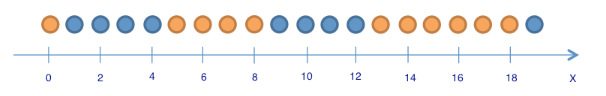

На рисунке 9 синих шариков и 11 жёлтых. Если мы наудачу вытащим шарик, то он с вероятностью $p_1=\frac{9}{20}$ будет синим и с вероятностью $p_2=\frac{11}{20}$ — жёлтым.

Значит, энтропия состояния

$$S_0 = -\frac{9}{20}\log_2{\frac{9}{20}}-\frac{11}{20}\log_2{\frac{11}{20}} \approx 1.$$

Само это значение пока ни о чём нам не говорит. Теперь посмотрим, как изменится энтропия, если разбить шарики на две группы — с координатой меньше либо равной 12 и больше 12.

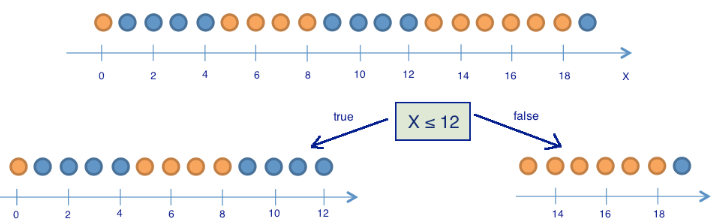

В левой группе оказалось 13 шаров, из которых 8 синих и 5 жёлтых. Энтропия этой группы равна

$$S_1 = -\frac{5}{13}\log_2{\frac{5}{13}}-\frac{8}{13}\log_2{\frac{8}{13}} \approx 0.96.$$

В правой группе оказалось 7 шаров, из которых 1 синий и 6 желтых. Энтропия правой группы равна

$$S_2 = -\frac{1}{7}\log_2{\frac{1}{7}}-\frac{6}{7}\log_2{\frac{6}{7}} \approx 0.6.$$

Как видим, энтропия уменьшилась в обеих группах по сравнению с начальным состоянием, хотя в левой и не сильно.

Поскольку энтропия — по сути, степень хаоса (или неопределённости) в системе, уменьшение энтропии называют <b><span style="color:green">приростом информации</span></b>. В этом случае прирост информации (IG) при разбиении выборки по признаку $j$ (в нашем примере это признак $x$, а разделяющее правило — "$x \leq 12$") имеет следующий вид:  

$$IG(x \leq 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16.$$

Получается, разделив шарики на две группы по признаку «координата меньше либо равна 12», мы уже получили более упорядоченную систему, чем вначале. Продолжим деление шариков на группы до тех пор, пока в каждой группе шарики не будут одного цвета.

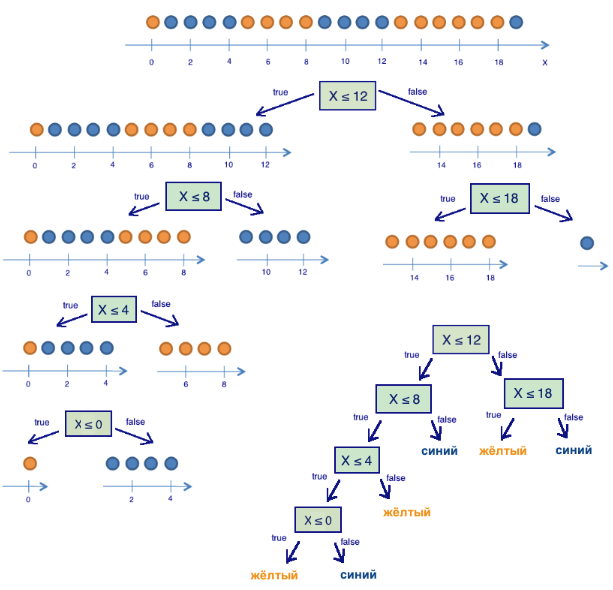

Для правой группы потребовалось всего одно дополнительное разбиение по признаку «координата меньше либо равна 18», для левой — ещё три. Очевидно, энтропия группы с шариками одного цвета равна 0 ($\log_2{1} = 0$), что соответствует представлению, что группа шариков одного цвета — упорядоченная.

В итоге мы построили дерево решений, предсказывающее цвет шарика по его координате. Отметим, что такое дерево решений может плохо работать для новых объектов (определения цвета новых шариков), поскольку оно идеально подстроилось под обучающую выборку (изначальные 20 шариков). Для классификации новых шариков лучше подойдет дерево с меньшим числом «вопросов» (или разделений), пусть даже оно и не идеально разбивает по цветам обучающую выборку.

### <span style="color:green">2. КРИТЕРИЙ ДЖИНИ

Кроме энтропийного критерия существуют и другие. Пусть $p_k$ — доля объектов класса $k$ в выборке $X$:  

$$p_k = \frac{1}{|X|} \sum\limits_{i \in X} [y_i = k].$$

Критерий информативности Джини формулируется в следующем виде:

$$S(X) = \sum\limits_{k=1}^{K}p_k(1-p_k).$$

Все слагаемые в сумме неотрицательные, поэтому критерий Джини также неотрицателен. Его оптимум достигается только в том случае, когда все объекты в $X$ относятся к одному классу.

### <span style="color:green">КРИТЕРИЙ ОСТАНОВКИ (ИЛИ КРИТЕРИЙ ОСТАНОВА)

Кроме критерия информативности, необходимо рассмотреть, какие мы можем вводить ограничения на дерево. Можно устанавливать различные критерии для остановки построения дерева, например:

* Ограничение максимальной глубины дерева.

* Ограничение максимального количества листьев в дереве.

* Ограничение минимального числа объектов в одном листе.

* Ограничение, на сколько процентов минимально должен улучшаться функционал качества при новом разветвлении.

[К содержанию](#0)

---

# Решающие деревья. Практика<a name="4"></a>

# Sklearn

## sklearn.tree

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

примеры: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

In [6]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, tree 

import numpy as np

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация данных

In [8]:
classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

In [9]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

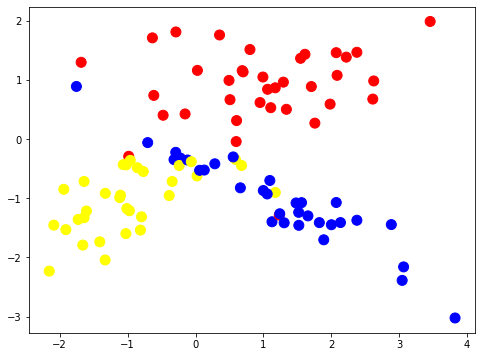

In [10]:
pylab.figure(figsize=(8,6))
pylab.scatter(list(map(lambda x: x[0], classification_problem[0])), list(map(lambda x: x[1], classification_problem[0])), 
              c=classification_problem[1], cmap=colors, s=100)


In [11]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

### Модель DecisionTreeClassifier

In [12]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(train_data, train_labels)

DecisionTreeClassifier(random_state=1)

In [13]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.7666666666666667

In [14]:
predictions

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0,
       2, 0, 0, 0, 2, 1, 2, 0])

### Разделяющая поверхность

In [15]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [16]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

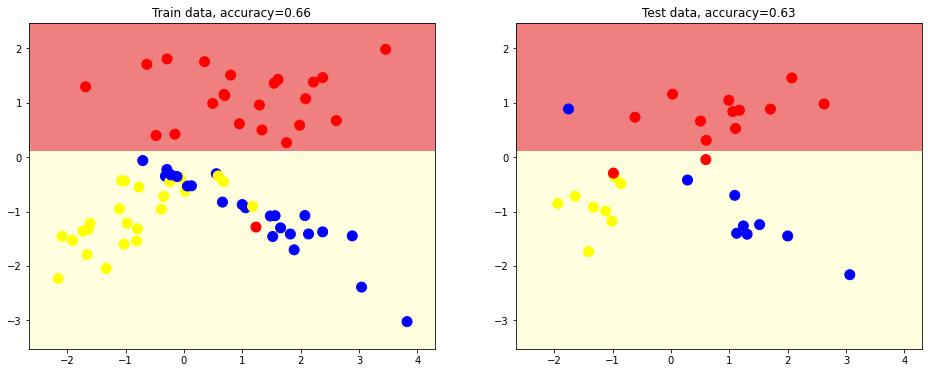

In [17]:
estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = 1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

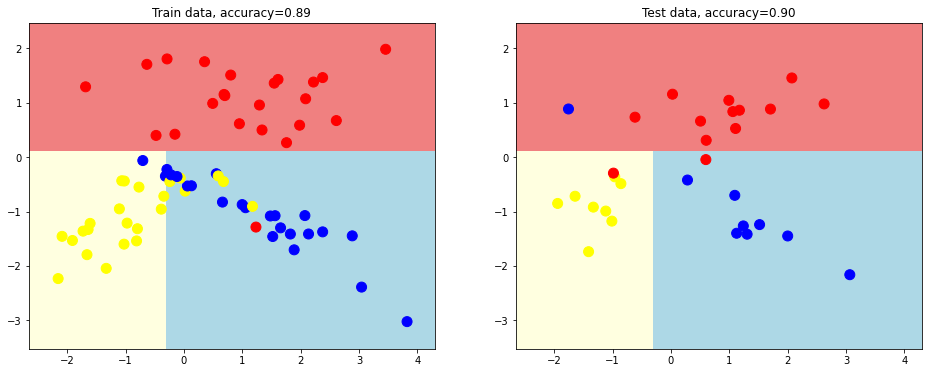

In [18]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, max_depth = 2),
                      train_data, train_labels, test_data, test_labels)

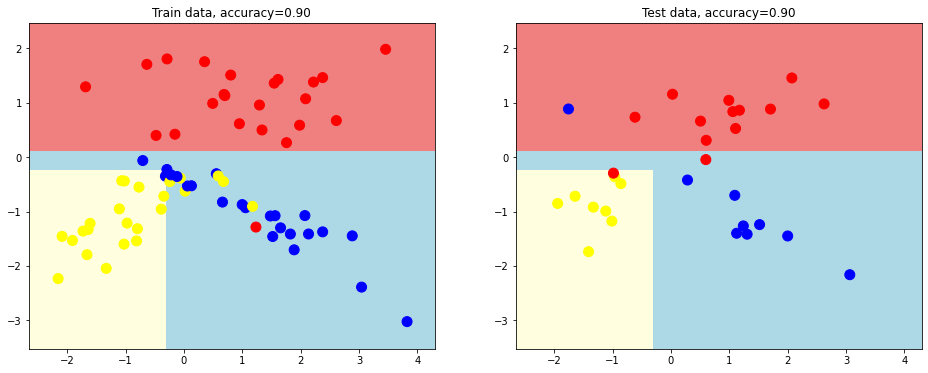

In [19]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, max_depth = 3),
                      train_data, train_labels, test_data, test_labels)

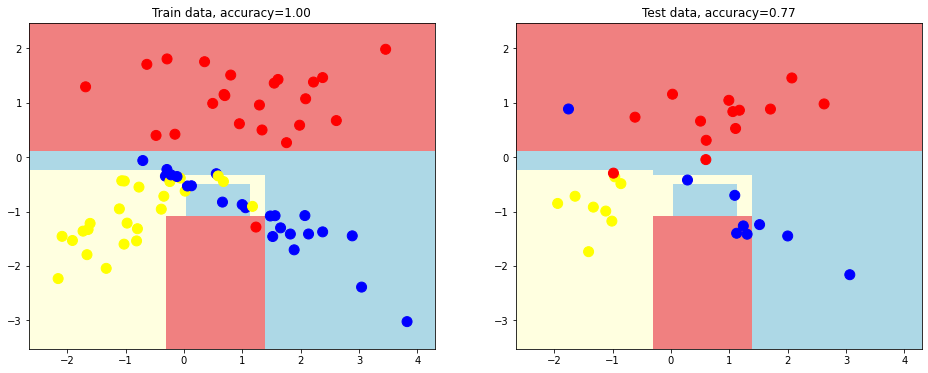

In [20]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1),
                      train_data, train_labels, test_data, test_labels)

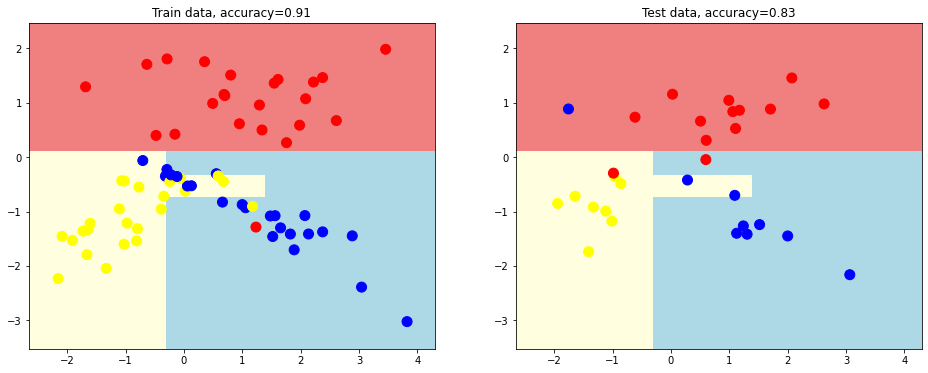

In [21]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, min_samples_leaf = 4), 
                      train_data, train_labels, test_data, test_labels)

[К содержанию](#0)

---

# Бэггинг<a name="5"></a>

### <span style="color:green">АНСАМБЛЬ МОДЕЛЕЙ (БЭГГИНГ)

*Bagging* — это параллельный способ построения ансамбля. Коротко о способе построения:  

* Обучающая выборка сэмплируется $k$ раз с помощью *bootstrap* (выбор с возвращением).
* На каждом сэмпле обучается отдельная базовая модель.
* Ответы моделей усредняются (возможно, с весами).  

Необходимость бэггинга может возникнуть тогда, когда вы уже нашли хорошую модель, и никак больше не можете повысить ее качество. В этом случае можно перейти к более продвинутой истории: использовать не одну модель (пусть и очень хорошую!), а ансамбли моделей. Под термином *ансамбли* понимается ряд продвинутых техник машинного обучения, о которых мы поговорим далее.

### ПРИМЕР: ТЕОРЕМА КОНДОРСА

Проиллюстрируем идею ансамблей на известном примере — теореме Кондорса о жюри присяжных, которая датируется аж 1784 годом!  

Представим, что у нас есть несколько членов жюри, мнение каждого из них независимо от мнения других. Мы не знаем, какая вероятность принятия верного решения у каждого члена жюри. Однако мы понимаем, что если вероятность принять правильное решение у какого-то члена жюри больше, чем $0.5$, то и общая вероятность принять верное решение возрастает. И наоборот, если вероятность принять правильное решение у какого-то члена жюри меньше, чем $0.5$, то общая вероятность принять верное решение падает.

### <span style="color:green">БЭГГИНГ (BAGGING, BOOTSTRAP AGGREGATING)

Цель бэггинга заключается в том, чтобы создать ансамбль из нескольких моделей. Такая ансамблевая модель будет надежнее, чем составляющие ее части.  

В основе бэггинга лежит статистический метод, который называется бутстрэпом (*bootstrap*). Идея бутстрэпа заключается в генерации выборок размера $B$ (так называемых бутстрэп-выборок) из исходного датасета размера $N$ путем случайного выбора элементов с повторениями в каждом из наблюдений $B$.

Рассмотрим идею бутстрэпа на элементарном примере.

Пусть у нас есть выборка из $12$ элементов. Тогда мы можем из нее выбирать различные выборки из нового количества элементов (в данном случае из 5). При этом, если мы использовали какой-то объект, то мы можем использовать его снова. Таким образом, мы можем из одной выборки получить множество новых.

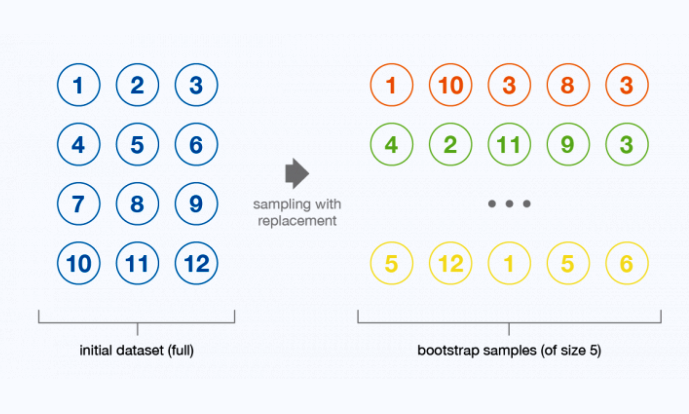

При некотором приближении можно считать, что получающиеся выборки являются <b><span style="color:green">независимыми</span></b> и <b><span style="color:green">репрезентативными</span></b>.  

Такие бутстрэп-выборки часто используются для оценки различных статистических показателей (например, разброса или доверительного интервала). Если вычислять статистические оценки на нескольких независимых выборках, то мы можем оценить их разброс. Поиск большого количества независимых выборок сложен в силу того, что для этого требуется слишком много данных. Поэтому мы используем бутстрэп, чтобы создать несколько выборок, которые являются независимыми и репрезентативными (но, опять же, стоит отметить, что такими их можно считать только при нескольких допущениях).  

Перейдем к понятию <b><span style="color:green">бэггинга</span></b>. При построении моделей всегда присутствует вероятность, что при обучении на других данных мы получили бы другие результаты. Для того, чтобы нивелировать такую вероятность, можно использовать бэггинг.   

Его идея состоит в том, что мы берем несколько независимых моделей и <b><span style="color:green">усредняем полученные по ним результаты</span></b>. Таким образом, мы получаем модель, имеющую меньший разброс, так как при ее построении мы учли несколько моделей. Как уже было сказано, в реальности получить много независимых выборок слишком сложно в силу того, что найти столько данных обычно не представляется возможным. Поэтому мы используем бутстрэп-выборки. 

> Важно отметить, что при бэггинге размер каждой бутстрэп-выборки должен совпадать с размером исходной выборки.

Схематично процесс бэггинга можно представить следующим образом:

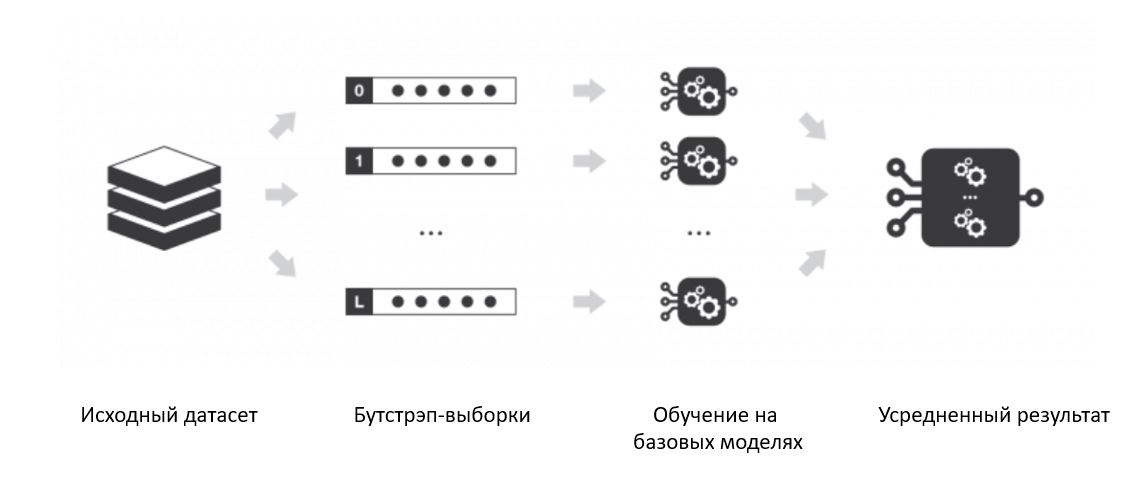

### <span style="color:green">RANDOM SUBSPACES (RSS)

Для построения набора различных моделей используется также метод выбора случайных подвыборок признаков Random Subspaces. Метод обеспечивает устойчивость алгоритма к набору доступных признаков.

### ЗАДАЧА О ВИНАХ

Реализуем бэггинг для деревьев решений. Для тренировки будем использовать датасет о винах. 

In [42]:
wine_data = pd.read_csv('winequality-red.csv', sep=';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Для начала подготовим данные к классификации. Условно разделим вино на хорошее и нет. Хорошим вином будем называть вино, параметр *quality* которого не менее $6$.

Теперь сравним несколько методов классификации: логистическую регрессию, решающее дерево и бэггинг.

Разбейте выборку на обучающую и тренировочную с параметрами <code>test_size=0.30, random_state=42</code>.

Обучите два классификатора: логистическую регрессию (с дефолтными параметрами) и решающее дерево (<code>random_state=42</code>, максимальная глубина равна $10$).

In [43]:
wine_data['quality'] = (wine_data['quality']>=6).astype(int)
display(wine_data[:5])
# определяем массивы независимых признаков и целевой переменной
X = wine_data.drop('quality', axis=1).values
y = wine_data['quality'].values

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [46]:
log = LogisticRegression()
tree = DecisionTreeClassifier(max_depth=10, random_state=42)

In [47]:
log.fit(X_train, y_train)
log_pred = log.predict(X_test)

In [48]:
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

Какой классификатор показывает лучшее значение *f1-score*?

In [55]:
print(f'f1-score(log) = {round(f1_score(y_test, log_pred), 3)}\nf1-score(tree) = {round(f1_score(y_test, tree_pred), 3)}')

f1-score(log) = 0.754
f1-score(tree) = 0.793


Обучите модель с использование бэггинга (функция <code>BaggingClassifier</code> с <code>random_state=42</code>, разделение выборки на обучающую и тренировочную с параметрами <code>test_size=0.30, random_state=42</code>) для алгоритма, показавшего лучшее качество, определите количество моделей $1500$. Вычислите новое значение *f1-score*.

In [56]:
from sklearn.ensemble import BaggingClassifier

In [57]:
clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)

In [61]:
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

In [62]:
print(f'f1-score(clf) = {round(f1_score(y_test, clf_pred), 3)}')

f1-score(clf) = 0.818


[К содержанию](#0)

---

# Случайный лес<a name="6"></a>

Решающие деревья являются хорошим семейством базовых классификаторов для бэггинга, поскольку они достаточно сложны и могут достигать нулевой ошибки на любой выборке. 

<b><span style="color:green">Метод случайных подпространств</span></b> позволяет снизить коррелированность между деревьями и избежать переобучения. Базовые алгоритмы обучаются на различных подмножествах признакового описания, которые также выделяются случайным образом. Над классическим бэггингом над деревьями решений, который мы рассмотрели в прошлом уроке, они имеют ряд преимуществ, заключающихся в возможности более точной настройки параметров модели.

>### <span style="color:green">АЛГОРИТМ ДЛЯ АНСАМБЛЯ МОДЕЛЕЙ, ИСПОЛЬЗУЮЩИХ МЕТОД СЛУЧАЙНОГО ПОДПРОСТРАНСТВА
>Ансамбль моделей, использующих метод случайного подпространства, можно построить, используя следующий алгоритм:
>
>1. Пусть количество объектов для обучения равно $N$, а количество признаков $D$.
>2. Выберите $L$ как число отдельных моделей в ансамбле.
>3. Для каждой отдельной модели $l$ выберите $dl$, $dl<D$ как число признаков для $l$. Обычно для всех моделей используется только одно значение $dl$.
>4. Для каждой отдельной модели $l$ создайте обучающую выборку, выбрав $dl$  признаков из $D$, и обучите модель.
>5. Теперь, чтобы применить модель ансамбля к новому объекту, объедините результаты отдельных $L$ моделей мажоритарным голосованием или путем комбинирования апостериорных вероятностей.

### <span style="color:green">АЛГОРИТМ ПОСТРОЕНИЯ СЛУЧАЙНОГО ЛЕСА, СОСТОЯЩЕГО ИЗ ДЕРЕВЬЕВ

Для каждого:

* сгенерировать выборку с помощью бутстрэпа;
* построить решающее дерево по выборке: по заданному критерию мы выбираем лучший признак, делаем разбиение в дереве по нему и так до исчерпания выборки → дерево строится, пока в каждом листе не более объектов или пока не достигнем определенной высоты дерева → при каждом разбиении сначала выбирается несколько случайных признаков из исходных, и оптимальное разделение выборки ищется только среди них.

Итоговый классификатор $a(x)= \frac {1}{N} \sum_{i=1}^{N} b_i(x)$, иными словами — для задачи классификации мы выбираем решение голосованием по большинству, а в задаче регрессии — средним.  

<b><span style="color:green">Рекомендуется</span></b> в задачах классификации брать $m= \sqrt{(n)}$, а в задачах регрессии — $m= \frac{n}{3}$, где $n$ — число признаков. Также рекомендуется в задачах классификации строить каждое дерево до тех пор, пока в каждом листе не окажется по одному объекту, а в задачах регрессии — пока в каждом листе не окажется по пять объектов.

Таким образом, <b><span style="color:green">случайный лес — это бэггинг</span></b> над решающими деревьями, при обучении которых для каждого разбиения признаки выбираются из некоторого случайного подмножества признаков.

### <span style="color:green">РЕАЛИЗАЦИЯ НА PYTHON  И ПОДБОР ПАРАМЕТРОВ

Теперь обучим случайный лес на простых данных и посмотрим, как можно подбирать параметры случайного леса для достижения наилучшего качества модели.

Откроем датасет, удалим признаки, не относящиеся к предсказанию (от дня недели, например, или от года погода не зависит), разделим на тестовую и обучающуюся выборки:

In [63]:
weather=pd.read_csv('temps_extended.csv')
y = weather['actual']
X = weather.drop(['actual','weekday','month','day','year'],axis =1)
X_train, X_val, Y_train, Y_val=train_test_split(X,y,test_size=0.3, random_state=42)

Попробуем подобрать гиперпараметры таким образом, чтобы получить оптимальный результат.

Если мы запускаем случайный лес без настройки параметров, то по умолчанию они следующие:

In [64]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
rf = RandomForestRegressor(random_state = 42)
# Look at parameters used by our current forest
print('Параметры по умолчанию:\n')
pprint(rf.get_params())

Параметры по умолчанию:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Попробуем подбирать разные значения для некоторых параметров. Для перебора вариантов возьмем следующие параметры:

* n_estimators 
* max_features 
* max_depth 
* min_samples_split 
* min_samples_leaf
* bootstrap  

Мы можем сами указать, какие значения гиперпараметров надо перебрать.

Зададим сетку гиперпараметров, которые будут перебираться:

In [65]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

Обучим наш лес:

In [66]:
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, 
                               cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

Давайте посмотрим, какие гиперпараметры нам предлагают как оптимальные:

In [67]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

### ЗАДАЧИ

Обучите случайный лес с предустановленными параметрами и теми параметрами, которые мы отобрали как оптимальные. В обоих вариантах поставьте <code>random_state =42</code>. Какое улучшение *MSE* дала подстановка отобранных гиперпараметров? Ответ округлите до одного знака после запятой.

In [68]:
rf = RandomForestRegressor(random_state=42)
best_rf = RandomForestRegressor(random_state=42, 
                                n_estimators=1000, 
                                min_samples_split=5, 
                                min_samples_leaf=2, 
                                max_features='sqrt', 
                                max_depth=10, 
                                bootstrap=True)

In [69]:
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_val)

In [70]:
best_rf.fit(X_train, Y_train)
best_rf_pred = best_rf.predict(X_val)

In [71]:
rf_MSE = mean_squared_error(Y_val, rf_pred)
best_rf_MSE = mean_squared_error(Y_val, best_rf_pred)
print(f'MSE(rf) = {round(rf_MSE, 1)}\nMSE(best_rf) = {round(best_rf_MSE, 1)}')

MSE(rf) = 24.6
MSE(best_rf) = 23.1


[К содержанию](#0)

---

# Случайный лес. Практика<a name="7"></a>

Разберёмся с <b><span style="color:green">ансамблями алгоритмов</span></b> и со <b><span style="color:green">случайным лесом</span></b>. Рассмотрим данные о сотрудниках компании, где указывается, ушёл сотрудник или нет.  

Сделаем <b><span style="color:green">базовую предобработку данных</span></b>: удалим признак, который отвечает за идентификатор пользователя как нерепрезетативный признак.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('HR-dataset.csv')

np.random.seed(42)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

target = 'left'
features = df.columns.drop(target)
features = features.drop('empid')  # Удалим идентификатор пользователя как нерепрезентативный признак
print(features)

X, y = df[features].copy(), df[target]

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')


Заменим идентификатор отдела, к которому относился сотрудник, на количество людей в отделе, а зарплату — на ординальную категорию. Масштабируем признаки для последующего сравнения результатов.

In [73]:
salary_ordinals = {'low': 1, 'medium': 2, 'high': 3}

X['dept'] = X['dept'].apply(X['dept'].value_counts().get)
X['salary'] = X['salary'].apply(salary_ordinals.get)

In [74]:
scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

В дальнейшем будем оценивать качество модели на кросс-валидации на пяти фолдах при помощи точности ($accuracy$).

In [75]:
def estimate_accuracy(clf, X, y, cv=5):
    return cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()

Посмотрим на то, как работает бэггинг над решающими деревьями.

>__Бэггинг__ (*bagging*, сокр. от *bootstrap aggregating*)  — метод построения композиции алгоритмов, в котором каждый алгоритм строится независимо от других на подвыборках обучающей выборки. Итоговый алгоритм принимает решения посредством голосования среди всех алгоритмов (возвращается самый частый ответ).

Посмотрим на точность одного дерева.

In [76]:
tree = DecisionTreeClassifier(max_depth=30)
print("Decision tree:", estimate_accuracy(tree, X, y))

Decision tree: 0.9731310659108592


Проведём бэггинг: для этого достаточно обернуть исходный классификатор в *BaggingClassifier*.

In [77]:
bagging_trees = BaggingClassifier(tree)
print("Decision tree bagging:", estimate_accuracy(bagging_trees, X, y))

Decision tree bagging: 0.9880660886962321


Композиция отдельных деревьев показывает себя лучше, чем одно дерево. Структура дерева серьёзно зависит от обучающей выборки. Это значит, что если немного изменить обучающую выборку, то дерево сильно изменится. Бэггинг идеально подходит в этом случае, поскольку композиция алгоритмов при помощи голосования работает наилучшим образом, когда модели различны.

Увеличить различность построенных деревьев можно, указав параметры *max_features* и *max_depth*.

In [78]:
random_tree = DecisionTreeClassifier(max_features=int(np.sqrt(len(features))), max_depth=30)
print("Random tree:", estimate_accuracy(random_tree, X, y))

Random tree: 0.9778657330221184


In [79]:
bagging_random_trees = BaggingClassifier(random_tree)
print("Random tree bagging:", estimate_accuracy(bagging_random_trees, X, y))

Random tree bagging: 0.9902662443036567


Именно так внутри и работает так называемый <b><span style="color:green">случайный лес</span></b> (*Random Forest*): он обучает набор деревьев (параметр *n_esimators*), каждое из которых обучается на подмножестве признаков (*Random Subspaces*) и на подмножестве объектов (*bootstrap*). То есть случайный лес получается случайным по двум этим параметрам, а ответы аггрегируются при помощи голосования.

>Стандартная эвристика: в <b><span style="color:green">задаче классификации</span></b> брать квадратный корень числа признаков, а в <b><span style="color:green">задаче регрессии</span></b> — треть числа признаков.

In [80]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    max_features=int(np.sqrt(len(features))),
    max_depth=30)
print("Random Forest:", estimate_accuracy(random_forest, X, y))

Random Forest: 0.9920663109925532


Ещё одно преимущество использования бэггинга для аггрегации моделей — получение <b><span style="color:green">оценки</span></b> работы классификатора без дополнительного проведения <b><span style="color:green">кросс-валидации</span></b> при помощи <b><span style="color:green">out-of-bag score</span></b>. Это метод вычисления произвольной оценки качества во время обучения бэггинга. Для подсчёта требуется указать параметр <b><span style="color:green">oob_score = True</span></b>, что имеет смысл при достаточном количестве деревьев.

In [81]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    max_features=int(np.sqrt(len(features))),
    max_depth=30,
    oob_score=True,
    n_jobs=-1
)
random_forest.fit(X, y)
random_forest.oob_score_.mean()

0.9929995333022201

Метод бэггинга можно применять к <b><span style="color:green">произвольным алгоритмам</span></b>, например, к логистической регрессии. 

In [82]:
lr = LogisticRegression(solver='saga', max_iter=200)
lr.fit(X, y)
print("LR:", estimate_accuracy(lr, X, y))

LR: 0.7709770367900411


In [83]:
random_logreg = BaggingClassifier(
    lr,
    n_estimators=10,
    n_jobs=-1,
    random_state=42
)
print("Bagging for LR:", estimate_accuracy(random_logreg, X, y))

Bagging for LR: 0.7701104368122708


В её случае он не так сильно повышает качество, поскольку линейные модели не так сильно зависят от состава обучающей выборки. Попробуем убрать часть признаков.

In [84]:
random_logreg = BaggingClassifier(
    lr,
    n_estimators=10,
    n_jobs=-1,
    max_features=0.5,
    random_state=42
)
print("Bagging for LR:", estimate_accuracy(random_logreg, X, y))

Bagging for LR: 0.7569754140268978


В случае линейной регрессии повышение разнообразности моделей не дает такого прироста, как с деревьями, поскольку модели сильно теряют в качестве. Случайный лес на примере нашей задачи справляется лучше.  

<b><span style="color:green">Сравнение</span></b> логистической регрессии и случайного леса:

In [85]:
def plot_predictions(X, y, clf, proba=False, points_size=7, xlabel='x', ylabel='y'):
    """Fits the classifier on the data (X, y) and plots the result on a 2-D plane."""
    def get_grid(data):
        x_std, y_std = data.std(axis=0)
        x_min, x_max = data[:, 0].min() - x_std / 2, data[:, 0].max() + x_std / 2
        y_min, y_max = data[:, 1].min() - y_std / 2, data[:, 1].max() + y_std / 2
        return np.meshgrid(np.linspace(x_min, x_max, num=200),
                           np.linspace(y_min, y_max, num=200))
    
    clf.fit(X, y)
    xx, yy = get_grid(X)
    if proba:
        predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    else:
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
    plt.figure(figsize=(10.0, 10.0))
    plt.pcolormesh(xx, yy, predicted, cmap=plt.cm.coolwarm, alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=points_size, cmap=plt.cm.coolwarm, alpha=0.90)
    plt.ylim([yy.min(),yy.max()])
    plt.xlim([xx.min(),xx.max()])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    return clf

### <span style="color:green">ПРАКТИКА

Загрузите датасет <b><span style="color:green">digits</span></b> с помощью функции *load_digits* из <b><span style="color:green">sklearn.datasets</span></b> и подготовьте матрицу признаков $X$ и ответы на обучающей выборке $y$ (вам потребуются поля *data* и *target* в объекте, который возвращает *load_digits*).

In [103]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits['data'], digits['target']

Информацию о датасете вы можете получить, обратившись к полю DESCR у возвращаемого объекта *load_digits*. Нам предстоит решать задачу классификации изображений с цифрами по численным признакам.

In [104]:
digits['DESCR']

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

Для оценки качества мы будем использовать <b><span style="color:green">cross_val_score</span></b> из <b><span style="color:green">sklearn.model_selection</span></b> с параметром $cv = 10$. Эта функция реализует *k-fold cross validation* c $k$ равным значению параметра $cv$. Предлагается использовать $k = 10$, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и $k = 5$. Функция *cross_val_score* будет возвращать *numpy.ndarray*, в котором будет $k$ чисел — качество в каждом из  экспериментов *k-fold cross validation*. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод <b><span style="color:green">.mean()</span></b> у массива, который возвращает *cross_val_score*.  

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадёт в диапазон, заданный для правильных ответов — в этом случае попробуйте перезапустить ячейку с cross_val_score несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.  

Чтобы ускорить вычисление *cross_val_score*, следует попробовать использовать параметр <b><span style="color:green">n_jobs</span></b>. Число, которое вы подаёте в качестве этого параметра, соответствует количеству потоков вашего процессора, которое будет задействовано в вычислении. Если указать *n_jobs = -1*, тогда будут задействовано максимальное число потоков.

In [105]:
def estimate_accuracy(clf, X, y, cv=5):
    return cross_val_score(clf, X, y, cv=cv, scoring='accuracy', n_jobs = -1).mean()

Создайте <code>DecisionTreeClassifier</code> с настройками по умолчанию и измерьте качество его работы с помощью <code>cross_val_score</code>.

In [106]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
estimate_accuracy(dtc, X, y, cv=10)

0.8269242706393545

Теперь давайте обучим <code>BaggingClassifier</code> на основе <code>DecisionTreeClassifier</code>. Из <code>sklearn.ensemble</code> импортируйте <code>BaggingClassifier</code>, все параметры задайте по умолчанию. Нужно изменить только количество базовых моделей, задав его равным $100$.

In [107]:
from sklearn.ensemble import BaggingClassifier
bc_dtc = BaggingClassifier(base_estimator=dtc, n_estimators=100)
estimate_accuracy(bc_dtc, X, y, cv=10)

0.9237150837988828

Теперь изучите параметры <code>BaggingClassifier</code> и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех $d$ признаках, а на $\sqrt{d}$ случайных признаках.

Корень из числа признаков — часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три, $\log{d}$ тоже имеет место быть. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков, добиваясь лучшего качества на кросс-валидации.

In [108]:
cnt_features = len(digits.feature_names)

In [109]:
sqrt_bc_dtc = BaggingClassifier(base_estimator=dtc, 
                                max_features=int(np.sqrt(cnt_features)), 
                                n_estimators=100)
estimate_accuracy(sqrt_bc_dtc, X, y, cv=10)

0.9298789571694602

В предыдущем пункте мы выбирали подмножество один раз для каждого очередного дерева. Следующим нашим шагом будет построение бэггинга на основе деревьев, которые выбирают случайное подмножество признаков для каждой вершины дерева.

Для этого нам потребуется перенести отвечающий за это параметр из <code>BaggingClassifier</code> в <code>DecisionTreeClassifier</code>. Для этого вам из документации нужно выяснить, какой параметр <code>DecisionTreeClassifier</code> за это отвечает.

По-прежнему сэмплируем $sqrt(d)$ признаков.

In [110]:
sqrt_dtc = DecisionTreeClassifier(max_features='sqrt')
bc_sqrt_dtc = BaggingClassifier(base_estimator=sqrt_dtc, n_estimators=100)
estimate_accuracy(bc_sqrt_dtc, X, y, cv=10)

0.9460211049037864

* При очень маленьком числе деревьев (5, 10, 15) случайный лес работает хуже, чем при большем числе деревьев.

* С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

* При большом количестве признаков (для данного датасета - 40-50) качество классификации становится хуже, чем при малом количестве признаков (10-15). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

* При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, так как из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг друга).

[К содержанию](#0)